In [1]:
#Import Packages
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import csv
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import cross_val_score, KFold,train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error as mse
from sklearn.model_selection import StratifiedKFold,KFold,GridSearchCV
from sklearn.feature_selection import RFECV,RFE,f_regression,mutual_info_regression,VarianceThreshold,SelectFromModel,mutual_info_regression
from sklearn.feature_extraction.image import grid_to_graph
from sklearn import feature_selection
from sklearn.cluster import FeatureAgglomeration
from sklearn.linear_model import BayesianRidge

import eli5
from eli5.sklearn import PermutationImportance

import shutil
import tempfile
from scipy import linalg, ndimage
from joblib import Memory as mem

C:\Users\wsjr\AppData\Local\Continuum\anaconda3\lib\site-packages\h5py\__init__.py:72: UserWarning: h5py is running against HDF5 1.10.2 when it was built against 1.10.3, this may cause problems
  '{0}.{1}.{2}'.format(*version.hdf5_built_version_tuple)
Using TensorFlow backend.


In [2]:
#Data import IMU
df = pd.read_csv('2ex1.csv',header=0)
df.head()
df1 = pd.read_csv('1ex1.csv',header=0)
df2= pd.read_csv('2ex2.csv',header=0)
df3= pd.read_csv('2ex3.csv',header=0)
df4= pd.read_csv('2ex4.csv',header=0)
df5= pd.read_csv('2ex5.csv',header=0)
df6= pd.read_csv('2ex6.csv',header=0)
df7= pd.read_csv('2ex7.csv',header=0)
df8= pd.read_csv('2ex8.csv',header=0)
df9= pd.read_csv('2ex9.csv',header=0)
df10= pd.read_csv('2ex10.csv',header=0)
df11= pd.read_csv('2ex11.csv',header=0)
df12= pd.read_csv('2ex12.csv',header=0)
df13= pd.read_csv('2ex13.csv',header=0)
df14= pd.read_csv('2ex14.csv',header=0)
df15= pd.read_csv('2ex15.csv',header=0)

X = df[['DS_DST1','DS_DST2','DS_DST3','DS_DST4','DS_DST5','DS_DST6','DS_DST7','DS_DST8','DS_DSD1','DS_DSD2','DS_DSD3','DS_DSD4','DS_DSDT','massSensorBucketTeeth Mass','MassSensor7 Mass','soilTransferSensor MassTot','SoilTransferSensor2 MassTot','Collisionsensor_Ground isColliding','Collisionsensor_Ground nminor','Collisionsensor_Ground nserious','Collisionsensor_Ground ncritical','DS_MotorRPM','DS_Fuel_Meter','DS_Slew_zdd','DS_Slew_ydd','DS_Slew_xdd','DS_Boom_zdd','DS_Boom_ydd','DS_Boom_xdd','DS_Dipper_zdd','DS_Dipper_ydd','DS_Dipper_xdd','DS_Bkt_zdd','DS_Bkt_ydd','DS_Bkt_xdd','DS_Bktwx','DS_Bktwy','DS_Bktwz','DS_Dipperwx','DS_Dipperwy','DS_Dipperwz','DS_Boomwx','DS_Boomwy','DS_Boomwz','DS_Upperwx','DS_Upperwy','DS_Upperwz']]
y = df[['Input_Slew RealValue','Input_BoomLift RealValue','Input_DipperArm RealValue','Input_Bucket RealValue']]
scaler_X=MinMaxScaler()
scaler_X = scaler_X.fit_transform(X)
X = pd.DataFrame(scaler_X)
scaler_y=MinMaxScaler()
scaler_y = scaler_y.fit_transform(y)
y = pd.DataFrame(scaler_y)

X2 = df2[['DS_DST1','DS_DST2','DS_DST3','DS_DST4','DS_DST5','DS_DST6','DS_DST7','DS_DST8','DS_DSD1','DS_DSD2','DS_DSD3','DS_DSD4','DS_DSDT','massSensorBucketTeeth Mass','MassSensor7 Mass','soilTransferSensor MassTot','SoilTransferSensor2 MassTot','Collisionsensor_Ground isColliding','Collisionsensor_Ground nminor','Collisionsensor_Ground nserious','Collisionsensor_Ground ncritical','DS_MotorRPM','DS_Fuel_Meter','DS_Slew_zdd','DS_Slew_ydd','DS_Slew_xdd','DS_Boom_zdd','DS_Boom_ydd','DS_Boom_xdd','DS_Dipper_zdd','DS_Dipper_ydd','DS_Dipper_xdd','DS_Bkt_zdd','DS_Bkt_ydd','DS_Bkt_xdd','DS_Bktwx','DS_Bktwy','DS_Bktwz','DS_Dipperwx','DS_Dipperwy','DS_Dipperwz','DS_Boomwx','DS_Boomwy','DS_Boomwz','DS_Upperwx','DS_Upperwy','DS_Upperwz']]
y2 = df2[['Input_Slew RealValue','Input_BoomLift RealValue','Input_DipperArm RealValue','Input_Bucket RealValue']]
scaler_X=MinMaxScaler()
scaler_X = scaler_X.fit_transform(X2)
X2 = pd.DataFrame(scaler_X)
scaler_y=MinMaxScaler()
scaler_y = scaler_y.fit_transform(y2)
y2 = pd.DataFrame(scaler_y)

X3 = df3[['DS_DST1','DS_DST2','DS_DST3','DS_DST4','DS_DST5','DS_DST6','DS_DST7','DS_DST8','DS_DSD1','DS_DSD2','DS_DSD3','DS_DSD4','DS_DSDT','massSensorBucketTeeth Mass','MassSensor7 Mass','soilTransferSensor MassTot','SoilTransferSensor2 MassTot','Collisionsensor_Ground isColliding','Collisionsensor_Ground nminor','Collisionsensor_Ground nserious','Collisionsensor_Ground ncritical','DS_MotorRPM','DS_Fuel_Meter','DS_Slew_zdd','DS_Slew_ydd','DS_Slew_xdd','DS_Boom_zdd','DS_Boom_ydd','DS_Boom_xdd','DS_Dipper_zdd','DS_Dipper_ydd','DS_Dipper_xdd','DS_Bkt_zdd','DS_Bkt_ydd','DS_Bkt_xdd','DS_Bktwx','DS_Bktwy','DS_Bktwz','DS_Dipperwx','DS_Dipperwy','DS_Dipperwz','DS_Boomwx','DS_Boomwy','DS_Boomwz','DS_Upperwx','DS_Upperwy','DS_Upperwz']]
y3 = df3[['Input_Slew RealValue','Input_BoomLift RealValue','Input_DipperArm RealValue','Input_Bucket RealValue']]
scaler_X=MinMaxScaler()
scaler_X = scaler_X.fit_transform(X3)
X3 = pd.DataFrame(scaler_X)
scaler_y=MinMaxScaler()
scaler_y = scaler_y.fit_transform(y3)
y3 = pd.DataFrame(scaler_y)

X4 = df4[['DS_DST1','DS_DST2','DS_DST3','DS_DST4','DS_DST5','DS_DST6','DS_DST7','DS_DST8','DS_DSD1','DS_DSD2','DS_DSD3','DS_DSD4','DS_DSDT','massSensorBucketTeeth Mass','MassSensor7 Mass','soilTransferSensor MassTot','SoilTransferSensor2 MassTot','Collisionsensor_Ground isColliding','Collisionsensor_Ground nminor','Collisionsensor_Ground nserious','Collisionsensor_Ground ncritical','DS_MotorRPM','DS_Fuel_Meter','DS_Slew_zdd','DS_Slew_ydd','DS_Slew_xdd','DS_Boom_zdd','DS_Boom_ydd','DS_Boom_xdd','DS_Dipper_zdd','DS_Dipper_ydd','DS_Dipper_xdd','DS_Bkt_zdd','DS_Bkt_ydd','DS_Bkt_xdd','DS_Bktwx','DS_Bktwy','DS_Bktwz','DS_Dipperwx','DS_Dipperwy','DS_Dipperwz','DS_Boomwx','DS_Boomwy','DS_Boomwz','DS_Upperwx','DS_Upperwy','DS_Upperwz']]
y4 = df4[['Input_Slew RealValue','Input_BoomLift RealValue','Input_DipperArm RealValue','Input_Bucket RealValue']]
scaler_X=MinMaxScaler()
scaler_X = scaler_X.fit_transform(X4)
X4 = pd.DataFrame(scaler_X)
scaler_y=MinMaxScaler()
scaler_y = scaler_y.fit_transform(y4)
y4 = pd.DataFrame(scaler_y)

X5 = df5[['DS_DST1','DS_DST2','DS_DST3','DS_DST4','DS_DST5','DS_DST6','DS_DST7','DS_DST8','DS_DSD1','DS_DSD2','DS_DSD3','DS_DSD4','DS_DSDT','massSensorBucketTeeth Mass','MassSensor7 Mass','soilTransferSensor MassTot','SoilTransferSensor2 MassTot','Collisionsensor_Ground isColliding','Collisionsensor_Ground nminor','Collisionsensor_Ground nserious','Collisionsensor_Ground ncritical','DS_MotorRPM','DS_Fuel_Meter','DS_Slew_zdd','DS_Slew_ydd','DS_Slew_xdd','DS_Boom_zdd','DS_Boom_ydd','DS_Boom_xdd','DS_Dipper_zdd','DS_Dipper_ydd','DS_Dipper_xdd','DS_Bkt_zdd','DS_Bkt_ydd','DS_Bkt_xdd','DS_Bktwx','DS_Bktwy','DS_Bktwz','DS_Dipperwx','DS_Dipperwy','DS_Dipperwz','DS_Boomwx','DS_Boomwy','DS_Boomwz','DS_Upperwx','DS_Upperwy','DS_Upperwz']]
y5 = df5[['Input_Slew RealValue','Input_BoomLift RealValue','Input_DipperArm RealValue','Input_Bucket RealValue']]
scaler_X=MinMaxScaler()
scaler_X = scaler_X.fit_transform(X5)
X5 = pd.DataFrame(scaler_X)
scaler_y=MinMaxScaler()
scaler_y = scaler_y.fit_transform(y5)
y5 = pd.DataFrame(scaler_y)

X6 = df6[['DS_DST1','DS_DST2','DS_DST3','DS_DST4','DS_DST5','DS_DST6','DS_DST7','DS_DST8','DS_DSD1','DS_DSD2','DS_DSD3','DS_DSD4','DS_DSDT','massSensorBucketTeeth Mass','MassSensor7 Mass','soilTransferSensor MassTot','SoilTransferSensor2 MassTot','Collisionsensor_Ground isColliding','Collisionsensor_Ground nminor','Collisionsensor_Ground nserious','Collisionsensor_Ground ncritical','DS_MotorRPM','DS_Fuel_Meter','DS_Slew_zdd','DS_Slew_ydd','DS_Slew_xdd','DS_Boom_zdd','DS_Boom_ydd','DS_Boom_xdd','DS_Dipper_zdd','DS_Dipper_ydd','DS_Dipper_xdd','DS_Bkt_zdd','DS_Bkt_ydd','DS_Bkt_xdd','DS_Bktwx','DS_Bktwy','DS_Bktwz','DS_Dipperwx','DS_Dipperwy','DS_Dipperwz','DS_Boomwx','DS_Boomwy','DS_Boomwz','DS_Upperwx','DS_Upperwy','DS_Upperwz']]
y6 = df6[['Input_Slew RealValue','Input_BoomLift RealValue','Input_DipperArm RealValue','Input_Bucket RealValue']]
scaler_X=MinMaxScaler()
scaler_X = scaler_X.fit_transform(X6)
X6 = pd.DataFrame(scaler_X)
scaler_y=MinMaxScaler()
scaler_y = scaler_y.fit_transform(y6)
y6 = pd.DataFrame(scaler_y)

X7 = df7[['DS_DST1','DS_DST2','DS_DST3','DS_DST4','DS_DST5','DS_DST6','DS_DST7','DS_DST8','DS_DSD1','DS_DSD2','DS_DSD3','DS_DSD4','DS_DSDT','massSensorBucketTeeth Mass','MassSensor7 Mass','soilTransferSensor MassTot','SoilTransferSensor2 MassTot','Collisionsensor_Ground isColliding','Collisionsensor_Ground nminor','Collisionsensor_Ground nserious','Collisionsensor_Ground ncritical','DS_MotorRPM','DS_Fuel_Meter','DS_Slew_zdd','DS_Slew_ydd','DS_Slew_xdd','DS_Boom_zdd','DS_Boom_ydd','DS_Boom_xdd','DS_Dipper_zdd','DS_Dipper_ydd','DS_Dipper_xdd','DS_Bkt_zdd','DS_Bkt_ydd','DS_Bkt_xdd','DS_Bktwx','DS_Bktwy','DS_Bktwz','DS_Dipperwx','DS_Dipperwy','DS_Dipperwz','DS_Boomwx','DS_Boomwy','DS_Boomwz','DS_Upperwx','DS_Upperwy','DS_Upperwz']]
y7 = df7[['Input_Slew RealValue','Input_BoomLift RealValue','Input_DipperArm RealValue','Input_Bucket RealValue']]
scaler_X=MinMaxScaler()
scaler_X = scaler_X.fit_transform(X7)
X7 = pd.DataFrame(scaler_X)
scaler_y=MinMaxScaler()
scaler_y = scaler_y.fit_transform(y7)
y7 = pd.DataFrame(scaler_y)

X8 = df8[['DS_DST1','DS_DST2','DS_DST3','DS_DST4','DS_DST5','DS_DST6','DS_DST7','DS_DST8','DS_DSD1','DS_DSD2','DS_DSD3','DS_DSD4','DS_DSDT','massSensorBucketTeeth Mass','MassSensor7 Mass','soilTransferSensor MassTot','SoilTransferSensor2 MassTot','Collisionsensor_Ground isColliding','Collisionsensor_Ground nminor','Collisionsensor_Ground nserious','Collisionsensor_Ground ncritical','DS_MotorRPM','DS_Fuel_Meter','DS_Slew_zdd','DS_Slew_ydd','DS_Slew_xdd','DS_Boom_zdd','DS_Boom_ydd','DS_Boom_xdd','DS_Dipper_zdd','DS_Dipper_ydd','DS_Dipper_xdd','DS_Bkt_zdd','DS_Bkt_ydd','DS_Bkt_xdd','DS_Bktwx','DS_Bktwy','DS_Bktwz','DS_Dipperwx','DS_Dipperwy','DS_Dipperwz','DS_Boomwx','DS_Boomwy','DS_Boomwz','DS_Upperwx','DS_Upperwy','DS_Upperwz']]
y8 = df8[['Input_Slew RealValue','Input_BoomLift RealValue','Input_DipperArm RealValue','Input_Bucket RealValue']]
scaler_X=MinMaxScaler()
scaler_X = scaler_X.fit_transform(X8)
X8 = pd.DataFrame(scaler_X)
scaler_y=MinMaxScaler()
scaler_y = scaler_y.fit_transform(y8)
y8 = pd.DataFrame(scaler_y)

X9 = df9[['DS_DST1','DS_DST2','DS_DST3','DS_DST4','DS_DST5','DS_DST6','DS_DST7','DS_DST8','DS_DSD1','DS_DSD2','DS_DSD3','DS_DSD4','DS_DSDT','massSensorBucketTeeth Mass','MassSensor7 Mass','soilTransferSensor MassTot','SoilTransferSensor2 MassTot','Collisionsensor_Ground isColliding','Collisionsensor_Ground nminor','Collisionsensor_Ground nserious','Collisionsensor_Ground ncritical','DS_MotorRPM','DS_Fuel_Meter','DS_Slew_zdd','DS_Slew_ydd','DS_Slew_xdd','DS_Boom_zdd','DS_Boom_ydd','DS_Boom_xdd','DS_Dipper_zdd','DS_Dipper_ydd','DS_Dipper_xdd','DS_Bkt_zdd','DS_Bkt_ydd','DS_Bkt_xdd','DS_Bktwx','DS_Bktwy','DS_Bktwz','DS_Dipperwx','DS_Dipperwy','DS_Dipperwz','DS_Boomwx','DS_Boomwy','DS_Boomwz','DS_Upperwx','DS_Upperwy','DS_Upperwz']]
y9 = df9[['Input_Slew RealValue','Input_BoomLift RealValue','Input_DipperArm RealValue','Input_Bucket RealValue']]
scaler_X=MinMaxScaler()
scaler_X = scaler_X.fit_transform(X9)
X9 = pd.DataFrame(scaler_X)
scaler_y=MinMaxScaler()
scaler_y = scaler_y.fit_transform(y9)
y9 = pd.DataFrame(scaler_y)

X10 = df10[['DS_DST1','DS_DST2','DS_DST3','DS_DST4','DS_DST5','DS_DST6','DS_DST7','DS_DST8','DS_DSD1','DS_DSD2','DS_DSD3','DS_DSD4','DS_DSDT','massSensorBucketTeeth Mass','MassSensor7 Mass','soilTransferSensor MassTot','SoilTransferSensor2 MassTot','Collisionsensor_Ground isColliding','Collisionsensor_Ground nminor','Collisionsensor_Ground nserious','Collisionsensor_Ground ncritical','DS_MotorRPM','DS_Fuel_Meter','DS_Slew_zdd','DS_Slew_ydd','DS_Slew_xdd','DS_Boom_zdd','DS_Boom_ydd','DS_Boom_xdd','DS_Dipper_zdd','DS_Dipper_ydd','DS_Dipper_xdd','DS_Bkt_zdd','DS_Bkt_ydd','DS_Bkt_xdd','DS_Bktwx','DS_Bktwy','DS_Bktwz','DS_Dipperwx','DS_Dipperwy','DS_Dipperwz','DS_Boomwx','DS_Boomwy','DS_Boomwz','DS_Upperwx','DS_Upperwy','DS_Upperwz']]
y10 = df10[['Input_Slew RealValue','Input_BoomLift RealValue','Input_DipperArm RealValue','Input_Bucket RealValue']]
scaler_X=MinMaxScaler()
scaler_X = scaler_X.fit_transform(X10)
X10 = pd.DataFrame(scaler_X)
scaler_y=MinMaxScaler()
scaler_y = scaler_y.fit_transform(y10)
y10 = pd.DataFrame(scaler_y)

X11 = df11[['DS_DST1','DS_DST2','DS_DST3','DS_DST4','DS_DST5','DS_DST6','DS_DST7','DS_DST8','DS_DSD1','DS_DSD2','DS_DSD3','DS_DSD4','DS_DSDT','massSensorBucketTeeth Mass','MassSensor7 Mass','soilTransferSensor MassTot','SoilTransferSensor2 MassTot','Collisionsensor_Ground isColliding','Collisionsensor_Ground nminor','Collisionsensor_Ground nserious','Collisionsensor_Ground ncritical','DS_MotorRPM','DS_Fuel_Meter','DS_Slew_zdd','DS_Slew_ydd','DS_Slew_xdd','DS_Boom_zdd','DS_Boom_ydd','DS_Boom_xdd','DS_Dipper_zdd','DS_Dipper_ydd','DS_Dipper_xdd','DS_Bkt_zdd','DS_Bkt_ydd','DS_Bkt_xdd','DS_Bktwx','DS_Bktwy','DS_Bktwz','DS_Dipperwx','DS_Dipperwy','DS_Dipperwz','DS_Boomwx','DS_Boomwy','DS_Boomwz','DS_Upperwx','DS_Upperwy','DS_Upperwz']]
y11 = df11[['Input_Slew RealValue','Input_BoomLift RealValue','Input_DipperArm RealValue','Input_Bucket RealValue']]
scaler_X=MinMaxScaler()
scaler_X = scaler_X.fit_transform(X11)
X11 = pd.DataFrame(scaler_X)
scaler_y=MinMaxScaler()
scaler_y = scaler_y.fit_transform(y11)
y11 = pd.DataFrame(scaler_y)

X12 = df12[['DS_DST1','DS_DST2','DS_DST3','DS_DST4','DS_DST5','DS_DST6','DS_DST7','DS_DST8','DS_DSD1','DS_DSD2','DS_DSD3','DS_DSD4','DS_DSDT','massSensorBucketTeeth Mass','MassSensor7 Mass','soilTransferSensor MassTot','SoilTransferSensor2 MassTot','Collisionsensor_Ground isColliding','Collisionsensor_Ground nminor','Collisionsensor_Ground nserious','Collisionsensor_Ground ncritical','DS_MotorRPM','DS_Fuel_Meter','DS_Slew_zdd','DS_Slew_ydd','DS_Slew_xdd','DS_Boom_zdd','DS_Boom_ydd','DS_Boom_xdd','DS_Dipper_zdd','DS_Dipper_ydd','DS_Dipper_xdd','DS_Bkt_zdd','DS_Bkt_ydd','DS_Bkt_xdd','DS_Bktwx','DS_Bktwy','DS_Bktwz','DS_Dipperwx','DS_Dipperwy','DS_Dipperwz','DS_Boomwx','DS_Boomwy','DS_Boomwz','DS_Upperwx','DS_Upperwy','DS_Upperwz']]
y12 = df12[['Input_Slew RealValue','Input_BoomLift RealValue','Input_DipperArm RealValue','Input_Bucket RealValue']]
scaler_X=MinMaxScaler()
scaler_X = scaler_X.fit_transform(X12)
X12 = pd.DataFrame(scaler_X)
scaler_y=MinMaxScaler()
scaler_y = scaler_y.fit_transform(y12)
y12 = pd.DataFrame(scaler_y)

X13 = df13[['DS_DST1','DS_DST2','DS_DST3','DS_DST4','DS_DST5','DS_DST6','DS_DST7','DS_DST8','DS_DSD1','DS_DSD2','DS_DSD3','DS_DSD4','DS_DSDT','massSensorBucketTeeth Mass','MassSensor7 Mass','soilTransferSensor MassTot','SoilTransferSensor2 MassTot','Collisionsensor_Ground isColliding','Collisionsensor_Ground nminor','Collisionsensor_Ground nserious','Collisionsensor_Ground ncritical','DS_MotorRPM','DS_Fuel_Meter','DS_Slew_zdd','DS_Slew_ydd','DS_Slew_xdd','DS_Boom_zdd','DS_Boom_ydd','DS_Boom_xdd','DS_Dipper_zdd','DS_Dipper_ydd','DS_Dipper_xdd','DS_Bkt_zdd','DS_Bkt_ydd','DS_Bkt_xdd','DS_Bktwx','DS_Bktwy','DS_Bktwz','DS_Dipperwx','DS_Dipperwy','DS_Dipperwz','DS_Boomwx','DS_Boomwy','DS_Boomwz','DS_Upperwx','DS_Upperwy','DS_Upperwz']]
y13 = df13[['Input_Slew RealValue','Input_BoomLift RealValue','Input_DipperArm RealValue','Input_Bucket RealValue']]
scaler_X=MinMaxScaler()
scaler_X = scaler_X.fit_transform(X13)
X13 = pd.DataFrame(scaler_X)
scaler_y=MinMaxScaler()
scaler_y = scaler_y.fit_transform(y13)
y13 = pd.DataFrame(scaler_y)

X14 = df14[['DS_DST1','DS_DST2','DS_DST3','DS_DST4','DS_DST5','DS_DST6','DS_DST7','DS_DST8','DS_DSD1','DS_DSD2','DS_DSD3','DS_DSD4','DS_DSDT','massSensorBucketTeeth Mass','MassSensor7 Mass','soilTransferSensor MassTot','SoilTransferSensor2 MassTot','Collisionsensor_Ground isColliding','Collisionsensor_Ground nminor','Collisionsensor_Ground nserious','Collisionsensor_Ground ncritical','DS_MotorRPM','DS_Fuel_Meter','DS_Slew_zdd','DS_Slew_ydd','DS_Slew_xdd','DS_Boom_zdd','DS_Boom_ydd','DS_Boom_xdd','DS_Dipper_zdd','DS_Dipper_ydd','DS_Dipper_xdd','DS_Bkt_zdd','DS_Bkt_ydd','DS_Bkt_xdd','DS_Bktwx','DS_Bktwy','DS_Bktwz','DS_Dipperwx','DS_Dipperwy','DS_Dipperwz','DS_Boomwx','DS_Boomwy','DS_Boomwz','DS_Upperwx','DS_Upperwy','DS_Upperwz']]
y14 = df14[['Input_Slew RealValue','Input_BoomLift RealValue','Input_DipperArm RealValue','Input_Bucket RealValue']]
scaler_X=MinMaxScaler()
scaler_X = scaler_X.fit_transform(X14)
X14 = pd.DataFrame(scaler_X)
scaler_y=MinMaxScaler()
scaler_y = scaler_y.fit_transform(y14)
y14 = pd.DataFrame(scaler_y)

X15 = df15[['DS_DST1','DS_DST2','DS_DST3','DS_DST4','DS_DST5','DS_DST6','DS_DST7','DS_DST8','DS_DSD1','DS_DSD2','DS_DSD3','DS_DSD4','DS_DSDT','massSensorBucketTeeth Mass','MassSensor7 Mass','soilTransferSensor MassTot','SoilTransferSensor2 MassTot','Collisionsensor_Ground isColliding','Collisionsensor_Ground nminor','Collisionsensor_Ground nserious','Collisionsensor_Ground ncritical','DS_MotorRPM','DS_Fuel_Meter','DS_Slew_zdd','DS_Slew_ydd','DS_Slew_xdd','DS_Boom_zdd','DS_Boom_ydd','DS_Boom_xdd','DS_Dipper_zdd','DS_Dipper_ydd','DS_Dipper_xdd','DS_Bkt_zdd','DS_Bkt_ydd','DS_Bkt_xdd','DS_Bktwx','DS_Bktwy','DS_Bktwz','DS_Dipperwx','DS_Dipperwy','DS_Dipperwz','DS_Boomwx','DS_Boomwy','DS_Boomwz','DS_Upperwx','DS_Upperwy','DS_Upperwz']]
y15 = df15[['Input_Slew RealValue','Input_BoomLift RealValue','Input_DipperArm RealValue','Input_Bucket RealValue']]
scaler_X=MinMaxScaler()
scaler_X = scaler_X.fit_transform(X15)
X15 = pd.DataFrame(scaler_X)
scaler_y=MinMaxScaler()
scaler_y = scaler_y.fit_transform(y15)
y15 = pd.DataFrame(scaler_y)

X_pred = df1[['DS_DST1','DS_DST2','DS_DST3','DS_DST4','DS_DST5','DS_DST6','DS_DST7','DS_DST8','DS_DSD1','DS_DSD2','DS_DSD3','DS_DSD4','DS_DSDT','massSensorBucketTeeth Mass','MassSensor7 Mass','soilTransferSensor MassTot','SoilTransferSensor2 MassTot','Collisionsensor_Ground isColliding','Collisionsensor_Ground nminor','Collisionsensor_Ground nserious','Collisionsensor_Ground ncritical','DS_MotorRPM','DS_Fuel_Meter','DS_Slew_zdd','DS_Slew_ydd','DS_Slew_xdd','DS_Boom_zdd','DS_Boom_ydd','DS_Boom_xdd','DS_Dipper_zdd','DS_Dipper_ydd','DS_Dipper_xdd','DS_Bkt_zdd','DS_Bkt_ydd','DS_Bkt_xdd','DS_Bktwx','DS_Bktwy','DS_Bktwz','DS_Dipperwx','DS_Dipperwy','DS_Dipperwz','DS_Boomwx','DS_Boomwy','DS_Boomwz','DS_Upperwx','DS_Upperwy','DS_Upperwz']]
y_actual = df1[['Input_Slew RealValue','Input_BoomLift RealValue','Input_DipperArm RealValue','Input_Bucket RealValue']]
scaler_X=MinMaxScaler()
scaler_X = scaler_X.fit_transform(X_pred)
X_pred = pd.DataFrame(scaler_X)
scaler_y=MinMaxScaler()
scaler_y = scaler_y.fit_transform(y_actual)
y_actual = pd.DataFrame(scaler_y)


X_train,X_test,y_train,y_test = train_test_split(X,y)
X_train2,X_test2,y_train2,y_test2 = train_test_split(X2,y2)
X_train3,X_test3,y_train3,y_test3 = train_test_split(X3,y3)
X_train4,X_test4,y_train4,y_test4 = train_test_split(X4,y4)
X_train5,X_test5,y_train5,y_test5 = train_test_split(X5,y5)
X_train6,X_test6,y_train6,y_test6 = train_test_split(X6,y6)
X_train7,X_test7,y_train7,y_test7 = train_test_split(X7,y7)
X_train8,X_test8,y_train8,y_test8 = train_test_split(X8,y8)
X_train9,X_test9,y_train9,y_test9 = train_test_split(X9,y9)
X_train10,X_test10,y_train10,y_test10 = train_test_split(X10,y10)
X_train11,X_test11,y_train11,y_test11 = train_test_split(X11,y11)
X_train12,X_test12,y_train12,y_test12 = train_test_split(X12,y12)
X_train13,X_test13,y_train13,y_test13 = train_test_split(X13,y13)
X_train14,X_test14,y_train14,y_test14 = train_test_split(X14,y14)
X_train15,X_test15,y_train15,y_test15 = train_test_split(X15,y15)

C:\Users\wsjr\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\data.py:334: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)
C:\Users\wsjr\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\data.py:334: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)
C:\Users\wsjr\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\data.py:334: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)
C:\Users\wsjr\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\data.py:334: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)
C:\Users\wsjr\AppData\Local\Continuum\an

In [3]:
#Create the main Neural Network
model = Sequential()
model.add(Dense(100,input_dim=47,kernel_initializer='normal',activation='relu'))
model.add(Dense(100,activation='relu'))
model.add(Dense(200,activation='relu'))
model.add(Dense(4,activation='sigmoid'))#Changed to sigmoid to allow 0 to 1

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 100)               4800      
_________________________________________________________________
dense_2 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_3 (Dense)              (None, 200)               20200     
_________________________________________________________________
dense_4 (Dense)              (None, 4)                 804       
Total params: 35,904
Trainable params: 35,904
Non-trainable params: 0
_________________________________________________________________


In [4]:
model.compile(loss='mse',optimizer='adam')

In [5]:
#Train Network
history = model.fit(X_train,y_train,batch_size=50,epochs=200,verbose=2,validation_data=(X_test,y_test),shuffle=False) #Changed shuffle to true

Train on 2139 samples, validate on 713 samples
Epoch 1/200
 - 2s - loss: 0.0497 - val_loss: 0.0256
Epoch 2/200
 - 0s - loss: 0.0176 - val_loss: 0.0138
Epoch 3/200
 - 0s - loss: 0.0111 - val_loss: 0.0104
Epoch 4/200
 - 0s - loss: 0.0094 - val_loss: 0.0092
Epoch 5/200
 - 0s - loss: 0.0084 - val_loss: 0.0084
Epoch 6/200
 - 0s - loss: 0.0076 - val_loss: 0.0076
Epoch 7/200
 - 0s - loss: 0.0071 - val_loss: 0.0071
Epoch 8/200
 - 0s - loss: 0.0067 - val_loss: 0.0067
Epoch 9/200
 - 0s - loss: 0.0063 - val_loss: 0.0064
Epoch 10/200
 - 0s - loss: 0.0060 - val_loss: 0.0061
Epoch 11/200
 - 0s - loss: 0.0058 - val_loss: 0.0059
Epoch 12/200
 - 0s - loss: 0.0055 - val_loss: 0.0056
Epoch 13/200
 - 0s - loss: 0.0053 - val_loss: 0.0054
Epoch 14/200
 - 0s - loss: 0.0052 - val_loss: 0.0054
Epoch 15/200
 - 0s - loss: 0.0050 - val_loss: 0.0052
Epoch 16/200
 - 0s - loss: 0.0049 - val_loss: 0.0051
Epoch 17/200
 - 0s - loss: 0.0047 - val_loss: 0.0050
Epoch 18/200
 - 0s - loss: 0.0046 - val_loss: 0.0049
Epoch 19

Epoch 152/200
 - 0s - loss: 7.9927e-04 - val_loss: 0.0018
Epoch 153/200
 - 0s - loss: 7.9351e-04 - val_loss: 0.0018
Epoch 154/200
 - 0s - loss: 7.9691e-04 - val_loss: 0.0017
Epoch 155/200
 - 0s - loss: 7.6826e-04 - val_loss: 0.0017
Epoch 156/200
 - 0s - loss: 7.5064e-04 - val_loss: 0.0017
Epoch 157/200
 - 0s - loss: 7.4219e-04 - val_loss: 0.0017
Epoch 158/200
 - 0s - loss: 7.4982e-04 - val_loss: 0.0017
Epoch 159/200
 - 0s - loss: 7.4468e-04 - val_loss: 0.0017
Epoch 160/200
 - 0s - loss: 7.3244e-04 - val_loss: 0.0017
Epoch 161/200
 - 0s - loss: 7.2351e-04 - val_loss: 0.0017
Epoch 162/200
 - 0s - loss: 7.3492e-04 - val_loss: 0.0017
Epoch 163/200
 - 0s - loss: 7.3399e-04 - val_loss: 0.0017
Epoch 164/200
 - 0s - loss: 7.2699e-04 - val_loss: 0.0017
Epoch 165/200
 - 0s - loss: 7.0242e-04 - val_loss: 0.0017
Epoch 166/200
 - 0s - loss: 7.2762e-04 - val_loss: 0.0017
Epoch 167/200
 - 0s - loss: 7.2175e-04 - val_loss: 0.0018
Epoch 168/200
 - 0s - loss: 7.8515e-04 - val_loss: 0.0017
Epoch 169/200


dict_keys(['val_loss', 'loss'])


No handles with labels found to put in legend.


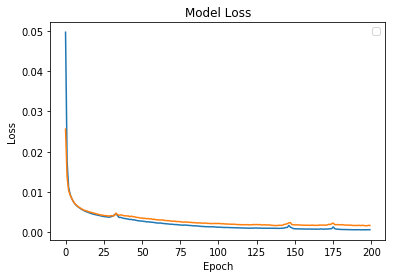

In [6]:
#Initial Results
print(history.history.keys())
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()


Text(0.5,1,'Driver actions')

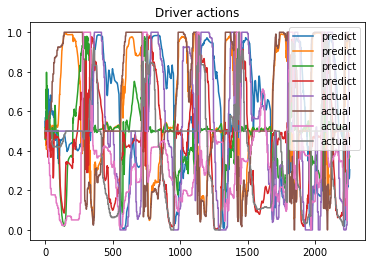

In [7]:
#Test
y_pred = model.predict(X_pred)
plt.plot(y_pred,label='predict')
plt.plot(y_actual,label='actual')
plt.legend()
plt.title('Driver actions')


In [8]:
mse(y_actual,y_pred)

0.036056388997746554

In [9]:
#Multivariant Statistics https://python-for-multivariate-analysis.readthedocs.io/a_little_book_of_python_for_multivariate_analysis.html

from pydoc import help  # can type in the python console `help(name of function)` to get the documentation
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import scale
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from scipy import stats
from IPython.display import display, HTML
from sklearn.linear_model import LassoCV

In [83]:
# https://towardsdatascience.com/feature-selection-correlation-and-p-value-da8921bfb3cf
# https://towardsdatascience.com/feature-selection-with-pandas-e3690ad8504b
# https://www.datacamp.com/community/tutorials/feature-selection-python

data = pd.read_csv("2ex1.csv")
data.columns = ["V"+str(i) for i in range(1, len(data.columns)+1)]  # rename column names to be similar to R naming convention
data.V1 = data.V1.astype(str)
X = data.drop(["V25","V26","V27","V28" ],axis=1)  # independent variables data
y = data.iloc[25:29]  # dependednt variable data

[2.44828499 1.13235761 1.17726339 1.16646802 0.93833961 0.
 1.16639995 1.1416395  1.28703013 1.17316129 1.10147091 1.16750102
 1.22627266 1.16639995 1.3870627  0.16622692 1.23554545 0.
 0.30273912 0.         0.01885416 0.         0.         0.72316254
 2.44628071 1.44350278 1.44350278 1.69165373 1.71430528 1.17687035
 1.10767464 1.33435032 1.08239665 1.71645925 1.49025637 1.34607657
 0.         0.         0.         0.83481083 0.79203603 0.36528521
 0.73661768 0.51195977 0.29021026 0.79009446 0.51195977 0.36528521
 0.8334551  0.92043558 0.78109613 0.81219792 0.81219792 1.05970599
 1.62076042 1.22250545 0.69832023 1.62076042 1.04162745 0.84509259
 1.62076042 1.23650479 1.62420762 1.62076042 1.6177082  1.70944089
 1.6822165  1.44787946 1.17362738]


C:\Users\wsjr\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
C:\Users\wsjr\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\wsjr\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\wsjr\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\coordinat

SelectFromModel(estimator=LassoCV(alphas=None, copy_X=True, cv='warn', eps=0.001, fit_intercept=True,
    max_iter=1000, n_alphas=100, n_jobs=None, normalize=False,
    positive=False, precompute='auto', random_state=None,
    selection='cyclic', tol=0.0001, verbose=False),
        max_features=None, norm_order=1, prefit=False, threshold=0.25)

SelectFromModel(estimator=LassoCV(alphas=None, copy_X=True, cv='warn', eps=0.001, fit_intercept=True,
    max_iter=1000, n_alphas=100, n_jobs=None, normalize=False,
    positive=False, precompute='auto', random_state=None,
    selection='cyclic', tol=0.0001, verbose=False),
        max_features=None, norm_order=1, prefit=False, threshold=0.25)


Text(0.5,1,'Features selected using SelectFromModel')

IndexError: index 1 is out of bounds for axis 1 with size 1

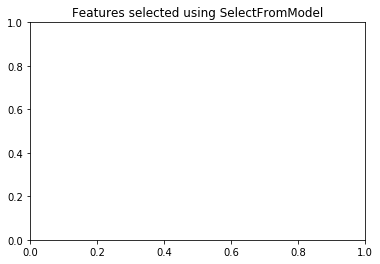

In [84]:
# SKLearn feature analysis
# https://scikit-learn.org/stable/modules/classes.html#module-sklearn.feature_select
y_test0 = y_test.iloc[:,0]
mi = mutual_info_regression(X_test,y_test0)
print(mi)
#vt = VarianceThreshold(X_test,y_test) this takes 1 to 2 positional arguments but 3 are given
#print(vt)
clf = LassoCV()
sfm = SelectFromModel(clf,threshold=0.25) #check this, from clf to model
sfm.fit(X_test,y_test0)
n_features = sfm.transform(X_test).shape[1]
print(sfm)

# Reset the threshold till the number of features equals two.
# Note that the attribute can be set directly instead of repeatedly
# fitting the metatransformer.
# https://scikit-learn.org/stable/auto_examples/feature_selection/plot_select_from_model_boston.html#sphx-glr-auto-examples-feature-selection-plot-select-from-model-boston-py
while n_features > 2:
    sfm.threshold += 0.1
    X_transform = sfm.transform(X_test)
    n_features = X_transform.shape[1]

# Plot the selected two features from X.
plt.title(
    "Features selected using SelectFromModel")
feature1 = X_transform[:, 0]
feature2 = X_transform[:, 1]
plt.plot(feature1, feature2, 'r.')
plt.xlabel("Feature number 1")
plt.ylabel("Feature number 2")
plt.ylim([np.min(feature2), np.max(feature2)])
plt.show()


[1.8295808  1.16513453 1.17444932 1.08929067 0.78959844 0.00821993
 1.02954357 1.07977486 1.16630011 1.05905871 1.1419009  1.1039918
 1.16021422 1.02954357 1.05527165 0.09898097 1.0613286  0.
 0.16897051 0.         0.         0.01703133 0.         0.62473169
 1.79362008 0.89100005 0.89100005 1.1616952  1.21829992 1.08220029
 0.84859264 1.08829921 0.73463677 1.24476183 1.24699454 1.08552593
 0.         0.         0.00852117 0.61837597 0.62942342 0.17181138
 0.53846777 0.36684105 0.22221561 0.61676487 0.36684105 0.17181138
 0.66763993 0.81255225 0.51288195 0.53309871 0.53309871 0.80135107
 0.99966977 1.30510537 0.63581933 0.99966977 1.35355896 0.73705155
 0.99966977 1.72796151 0.99723616 0.99966977 0.99947826 1.2436756
 1.16166512 0.89083586 1.08106305]


C:\Users\wsjr\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
C:\Users\wsjr\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\wsjr\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\wsjr\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\coordinat

SelectFromModel(estimator=LassoCV(alphas=None, copy_X=True, cv='warn', eps=0.001, fit_intercept=True,
    max_iter=1000, n_alphas=100, n_jobs=None, normalize=False,
    positive=False, precompute='auto', random_state=None,
    selection='cyclic', tol=0.0001, verbose=False),
        max_features=None, norm_order=1, prefit=False, threshold=0.25)

SelectFromModel(estimator=LassoCV(alphas=None, copy_X=True, cv='warn', eps=0.001, fit_intercept=True,
    max_iter=1000, n_alphas=100, n_jobs=None, normalize=False,
    positive=False, precompute='auto', random_state=None,
    selection='cyclic', tol=0.0001, verbose=False),
        max_features=None, norm_order=1, prefit=False, threshold=0.25)


Text(0.5,1,'Features selected using SelectFromModel')

Text(0.5,0,'Feature number 1')

Text(0,0.5,'Feature number 2')

(0.0, 0.9956816066401754)

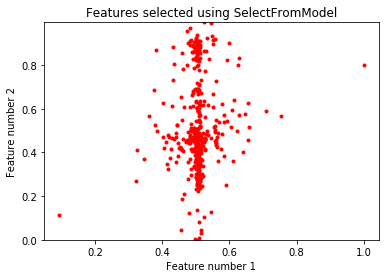

In [85]:
# SKLearn feature analysis
# https://scikit-learn.org/stable/modules/classes.html#module-sklearn.feature_select
y_test1 = y_test.iloc[:,1]
mi = mutual_info_regression(X_test,y_test1)
print(mi)
#vt = VarianceThreshold(X_test,y_test) this takes 1 to 2 positional arguments but 3 are given
#print(vt)
clf = LassoCV()
sfm = SelectFromModel(clf,threshold=0.25) #check this
sfm.fit(X_test,y_test1)
n_features = sfm.transform(X_test).shape[1]
print(sfm)

# Reset the threshold till the number of features equals two.
# Note that the attribute can be set directly instead of repeatedly
# fitting the metatransformer.
# https://scikit-learn.org/stable/auto_examples/feature_selection/plot_select_from_model_boston.html#sphx-glr-auto-examples-feature-selection-plot-select-from-model-boston-py
while n_features > 2:
    sfm.threshold += 0.1
    X_transform = sfm.transform(X_test)
    n_features = X_transform.shape[1]

# Plot the selected two features from X.
plt.title(
    "Features selected using SelectFromModel")
feature1 = X_transform[:, 0]
feature2 = X_transform[:, 1]
plt.plot(feature1, feature2, 'r.')
plt.xlabel("Feature number 1")
plt.ylabel("Feature number 2")
plt.ylim([np.min(feature2), np.max(feature2)])
plt.show()

[1.32816974e+00 5.30931145e-01 6.56524292e-01 4.93782363e-01
 4.26498835e-01 0.00000000e+00 4.99142897e-01 5.58753473e-01
 5.53494444e-01 5.06760953e-01 6.93806082e-01 4.43389415e-01
 5.77996851e-01 4.99142897e-01 5.72663398e-01 1.17040855e-01
 7.64978159e-01 1.22766927e-03 1.03642856e-01 4.78430210e-02
 1.06611790e-02 0.00000000e+00 3.57567359e-02 4.42697350e-01
 1.32755364e+00 6.61407729e-01 6.61407729e-01 8.59640361e-01
 9.64999490e-01 5.43282505e-01 6.40983373e-01 7.67928009e-01
 6.86809297e-01 9.71820957e-01 7.22065520e-01 7.60014783e-01
 5.73988528e-02 6.71837948e-03 3.81881282e-02 3.71685048e-01
 3.99365742e-01 1.67079921e-01 4.32002038e-01 3.24610140e-01
 2.19714285e-01 3.56915050e-01 3.24610140e-01 1.67079921e-01
 3.87279303e-01 5.19810878e-01 4.97006886e-01 5.02165536e-01
 5.02165536e-01 5.05062148e-01 8.04529013e-01 7.37479723e-01
 4.70527237e-01 8.04529013e-01 6.21937032e-01 5.16319563e-01
 8.04529013e-01 6.92177352e-01 7.97429970e-01 8.04529013e-01
 8.04655594e-01 9.547865

C:\Users\wsjr\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
C:\Users\wsjr\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\wsjr\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\wsjr\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\coordinat

SelectFromModel(estimator=LassoCV(alphas=None, copy_X=True, cv='warn', eps=0.001, fit_intercept=True,
    max_iter=1000, n_alphas=100, n_jobs=None, normalize=False,
    positive=False, precompute='auto', random_state=None,
    selection='cyclic', tol=0.0001, verbose=False),
        max_features=None, norm_order=1, prefit=False, threshold=0.25)

SelectFromModel(estimator=LassoCV(alphas=None, copy_X=True, cv='warn', eps=0.001, fit_intercept=True,
    max_iter=1000, n_alphas=100, n_jobs=None, normalize=False,
    positive=False, precompute='auto', random_state=None,
    selection='cyclic', tol=0.0001, verbose=False),
        max_features=None, norm_order=1, prefit=False, threshold=0.25)


Text(0.5,1,'Features selected from Boston using SelectFromModel')

Text(0.5,0,'Feature number 1')

Text(0,0.5,'Feature number 2')

(0.09329526013669737, 1.0)

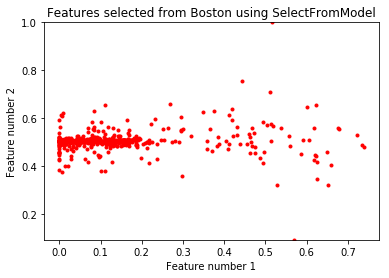

In [86]:
# SKLearn feature analysis
# https://scikit-learn.org/stable/modules/classes.html#module-sklearn.feature_select
y_test2 = y_test.iloc[:,2]
mi = mutual_info_regression(X_test,y_test2)
print(mi)
#vt = VarianceThreshold(X_test,y_test) this takes 1 to 2 positional arguments but 3 are given
#print(vt)
clf = LassoCV()
sfm = SelectFromModel(clf,threshold=0.25) #check this
sfm.fit(X_test,y_test2)
n_features = sfm.transform(X_test).shape[1]
print(sfm)

# Reset the threshold till the number of features equals two.
# Note that the attribute can be set directly instead of repeatedly
# fitting the metatransformer.
# https://scikit-learn.org/stable/auto_examples/feature_selection/plot_select_from_model_boston.html#sphx-glr-auto-examples-feature-selection-plot-select-from-model-boston-py
while n_features > 2:
    sfm.threshold += 0.1
    X_transform = sfm.transform(X_test)
    n_features = X_transform.shape[1]

# Plot the selected two features from X.
plt.title(
    "Features selected from Boston using SelectFromModel")
feature1 = X_transform[:, 0]
feature2 = X_transform[:, 1]
plt.plot(feature1, feature2, 'r.')
plt.xlabel("Feature number 1")
plt.ylabel("Feature number 2")
plt.ylim([np.min(feature2), np.max(feature2)])
plt.show()

[1.56586514 0.84354937 0.88646955 0.80544215 0.65768293 0.
 0.79485293 1.04215595 0.94566723 0.81073566 0.92418445 0.88458659
 0.90691765 0.79485293 0.96313218 0.08992332 0.88301792 0.
 0.25608508 0.00213239 0.         0.02768097 0.         0.65084364
 1.56802053 0.74921584 0.74921584 1.06931826 1.10964345 0.75745855
 0.69648602 0.80450769 0.7712617  1.14690555 1.29745207 1.19769924
 0.         0.         0.         0.52353548 0.54417951 0.11659787
 0.54786766 0.191282   0.13179896 0.51598456 0.191282   0.11659787
 0.57817544 0.86419309 0.52818872 0.50915806 0.50915806 0.86122908
 0.91692412 1.10355647 0.52065131 0.91692412 0.84950585 0.61534133
 0.91692412 1.01689446 0.92069735 0.91692412 0.90986113 1.11449051
 1.06864538 0.74400985 0.75593039]


C:\Users\wsjr\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
C:\Users\wsjr\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\wsjr\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\wsjr\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\coordinat

SelectFromModel(estimator=LassoCV(alphas=None, copy_X=True, cv='warn', eps=0.001, fit_intercept=True,
    max_iter=1000, n_alphas=100, n_jobs=None, normalize=False,
    positive=False, precompute='auto', random_state=None,
    selection='cyclic', tol=0.0001, verbose=False),
        max_features=None, norm_order=1, prefit=False, threshold=0.25)

SelectFromModel(estimator=LassoCV(alphas=None, copy_X=True, cv='warn', eps=0.001, fit_intercept=True,
    max_iter=1000, n_alphas=100, n_jobs=None, normalize=False,
    positive=False, precompute='auto', random_state=None,
    selection='cyclic', tol=0.0001, verbose=False),
        max_features=None, norm_order=1, prefit=False, threshold=0.25)


Text(0.5,1,'Features selected from Boston using SelectFromModel')

IndexError: index 1 is out of bounds for axis 1 with size 1

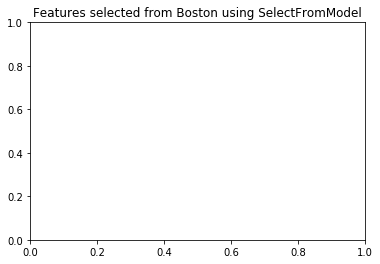

In [87]:
# SKLearn feature analysis
# https://scikit-learn.org/stable/modules/classes.html#module-sklearn.feature_select
y_test3 = y_test.iloc[:,3]
mi = mutual_info_regression(X_test,y_test3)
print(mi)
#vt = VarianceThreshold(X_test,y_test) this takes 1 to 2 positional arguments but 3 are given
#print(vt)
clf = LassoCV()
sfm = SelectFromModel(clf,threshold=0.25) #check this
sfm.fit(X_test,y_test3)
n_features = sfm.transform(X_test).shape[1]
print(sfm)

# Reset the threshold till the number of features equals two.
# Note that the attribute can be set directly instead of repeatedly
# fitting the metatransformer.
# https://scikit-learn.org/stable/auto_examples/feature_selection/plot_select_from_model_boston.html#sphx-glr-auto-examples-feature-selection-plot-select-from-model-boston-py
while n_features > 2:
    sfm.threshold += 0.1
    X_transform = sfm.transform(X_test)
    n_features = X_transform.shape[1]

# Plot the selected two features from X.
plt.title(
    "Features selected from Boston using SelectFromModel")
feature1 = X_transform[:, 0]
feature2 = X_transform[:, 1]
plt.plot(feature1, feature2, 'r.')
plt.xlabel("Feature number 1")
plt.ylabel("Feature number 2")
plt.ylim([np.min(feature2), np.max(feature2)])
plt.show()

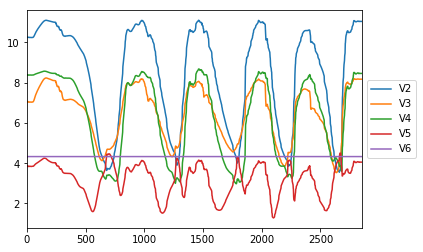

In [88]:
ax = data[["V2","V3","V4","V5","V6"]].plot()
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5));

In [89]:
def mosthighlycorrelated(mydataframe, numtoreport):
    # find the correlations
    cormatrix = mydataframe.corr()
    # set the correlations on the diagonal or lower triangle to zero,
    # so they will not be reported as the highest ones:
    cormatrix *= np.tri(*cormatrix.values.shape, k=-1).T
    # find the top n correlations
    cormatrix = cormatrix.stack()
    cormatrix = cormatrix.reindex(cormatrix.abs().sort_values(ascending=False).index).reset_index()
    # assign human-friendly names
    cormatrix.columns = ["FirstVariable", "SecondVariable", "Correlation"]
    return cormatrix.head(numtoreport)

mosthighlycorrelated(X, 60)

,FirstVariable,SecondVariable,Correlation
0,V56,V57,1.000000
1,V59,V62,1.000000
2,V62,V65,1.000000
3,V59,V68,1.000000
4,V62,V68,1.000000
5,V59,V65,1.000000
6,V48,V51,1.000000
7,V46,V52,1.000000
8,V7,V14,1.000000
9,V65,V68,1.000000


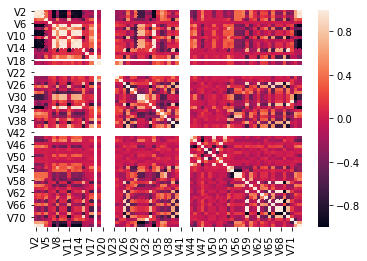

In [90]:
# https://towardsdatascience.com/feature-selection-correlation-and-p-value-da8921bfb3cf
corr = data.corr()
sns.heatmap(corr)

In [ ]:
#Shuffle column
# https://gis.stackexchange.com/questions/112681/randomly-shuffle-values-from-a-column-into-a-series-of-new-columns-in-a-feature

X_train = []

for i in X_train.columns[i]:
    X_train1 = np.random.permutation(X_train[i].values)
    neuralnet.predict(X_train1,y_train)
    print("Shuffle column"+ i + "with result" + neuralnetacc)
    

In [10]:
# https://machinelearningmastery.com/feature-selection-in-python-with-scikit-learn/
# https://www.datacamp.com/community/tutorials/feature-selection-python
# https://blog.datadive.net/selecting-good-features-part-iv-stability-selection-rfe-and-everything-side-by-side/
# https://medium.com/@feraguilari/multiple-regression-and-recursive-feature-elimination-rfe-34af0c6ae51b
# https://topepo.github.io/caret/recursive-feature-elimination.html
# https://towardsdatascience.com/feature-selection-in-python-recursive-feature-elimination-19f1c39b8d15
# https://medium.com/@mehulved1503/feature-selection-and-feature-extraction-in-machine-learning-an-overview-57891c595e96
# https://bookdown.org/max/FES/classes-of-feature-selection-methodologies.html
# https://topepo.github.io/caret/recursive-feature-elimination.html

from sklearn.neural_network import MLPRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from math import sqrt
from sklearn.metrics import r2_score

df = pd.read_csv('2ex1.csv',header=0)
X = df[['DS_DST1','DS_DST2','DS_DST3','DS_DST4','DS_DST5','DS_DST6','DS_DST7','DS_DST8','DS_DSD1','DS_DSD2','DS_DSD3','DS_DSD4','DS_DSDT','massSensorBucketTeeth Mass','MassSensor7 Mass','soilTransferSensor MassTot','SoilTransferSensor2 MassTot','Collisionsensor_Ground isColliding','Collisionsensor_Ground nminor','Collisionsensor_Ground nserious','Collisionsensor_Ground ncritical','DS_MotorRPM','DS_Fuel_Meter','DS_Slew_zdd','DS_Slew_ydd','DS_Slew_xdd','DS_Boom_zdd','DS_Boom_ydd','DS_Boom_xdd','DS_Dipper_zdd','DS_Dipper_ydd','DS_Dipper_xdd','DS_Bkt_zdd','DS_Bkt_ydd','DS_Bkt_xdd','DS_Bktwx','DS_Bktwy','DS_Bktwz','DS_Dipperwx','DS_Dipperwy','DS_Dipperwz','DS_Boomwx','DS_Boomwy','DS_Boomwz','DS_Upperwx','DS_Upperwy','DS_Upperwz']]
y = df[['Input_Slew RealValue','Input_BoomLift RealValue','Input_DipperArm RealValue','Input_Bucket RealValue']]
scaler_X=MinMaxScaler()
scaler_X = scaler_X.fit_transform(X)
X = pd.DataFrame(scaler_X)
scaler_y=MinMaxScaler()
scaler_y = scaler_y.fit_transform(y)
y = pd.DataFrame(scaler_y)

X_pred = df1[['DS_DST1','DS_DST2','DS_DST3','DS_DST4','DS_DST5','DS_DST6','DS_DST7','DS_DST8','DS_DSD1','DS_DSD2','DS_DSD3','DS_DSD4','DS_DSDT','massSensorBucketTeeth Mass','MassSensor7 Mass','soilTransferSensor MassTot','SoilTransferSensor2 MassTot','Collisionsensor_Ground isColliding','Collisionsensor_Ground nminor','Collisionsensor_Ground nserious','Collisionsensor_Ground ncritical','DS_MotorRPM','DS_Fuel_Meter','DS_Slew_zdd','DS_Slew_ydd','DS_Slew_xdd','DS_Boom_zdd','DS_Boom_ydd','DS_Boom_xdd','DS_Dipper_zdd','DS_Dipper_ydd','DS_Dipper_xdd','DS_Bkt_zdd','DS_Bkt_ydd','DS_Bkt_xdd','DS_Bktwx','DS_Bktwy','DS_Bktwz','DS_Dipperwx','DS_Dipperwy','DS_Dipperwz','DS_Boomwx','DS_Boomwy','DS_Boomwz','DS_Upperwx','DS_Upperwy','DS_Upperwz']]
y_actual = df1[['Input_Slew RealValue','Input_BoomLift RealValue','Input_DipperArm RealValue','Input_Bucket RealValue']]
scaler_X=MinMaxScaler()
scaler_X = scaler_X.fit_transform(X_pred)
X_pred = pd.DataFrame(scaler_X)
scaler_y=MinMaxScaler()
scaler_y = scaler_y.fit_transform(y_actual)
y_actual = pd.DataFrame(scaler_y)


X_train,X_test,y_train,y_test = train_test_split(X,y)

y_train0 = y_train.iloc[:,0]

#sklnn = MLPRegressor(hidden_layer_sizes=(50,100,50),activation='relu',solver='adam')
lr = LinearRegression()
lr.fit(X_train,y_train0)
rfe = RFE(estimator=lr,n_features_to_select=3,step=1,verbose=2)
rfe.fit(X_train,y_train0)

#print("No.Features: %s" % (rfe.n_features))
print("Selected Features: %s" % (rfe.support_))
print("Feature Ranking: %s" % (rfe.ranking_))

C:\Users\wsjr\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\data.py:334: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)
C:\Users\wsjr\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\data.py:334: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


Fitting estimator with 47 features.
Fitting estimator with 46 features.
Fitting estimator with 45 features.
Fitting estimator with 44 features.
Fitting estimator with 43 features.
Fitting estimator with 42 features.
Fitting estimator with 41 features.
Fitting estimator with 40 features.
Fitting estimator with 39 features.
Fitting estimator with 38 features.
Fitting estimator with 37 features.
Fitting estimator with 36 features.
Fitting estimator with 35 features.
Fitting estimator with 34 features.
Fitting estimator with 33 features.
Fitting estimator with 32 features.
Fitting estimator with 31 features.
Fitting estimator with 30 features.
Fitting estimator with 29 features.
Fitting estimator with 28 features.
Fitting estimator with 27 features.
Fitting estimator with 26 features.
Fitting estimator with 25 features.
Fitting estimator with 24 features.
Fitting estimator with 23 features.
Fitting estimator with 22 features.
Fitting estimator with 21 features.
Fitting estimator with 20 fe

In [92]:
#Permutation Importance
# https://www.kaggle.com/ourique/permutation-importance
# https://towardsdatascience.com/feature-importance-with-neural-network-346eb6205743
sklnn.fit(X_train,y_train)
perm = PermutationImportance(sklnn,random_state=1).fit(X_test,y_test)
eli5.show_weights(perm)

MLPRegressor(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(50, 100, 50), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
       random_state=None, shuffle=True, solver='adam', tol=0.0001,
       validation_fraction=0.1, verbose=False, warm_start=False)

Weight,Feature
0.1283 ± 0.0092,x65
0.0986 ± 0.0110,x28
0.0386 ± 0.0017,x61
0.0370 ± 0.0054,x1
0.0354 ± 0.0061,x3
0.0341 ± 0.0040,x13
0.0286 ± 0.0037,x2
0.0275 ± 0.0039,x6
0.0263 ± 0.0010,x35
0.0229 ± 0.0052,x0


In [93]:
perm.feature_importances_

array([ 2.28505992e-02,  3.69956121e-02,  2.85734207e-02,  3.53788587e-02,
        1.62444959e-02,  0.00000000e+00,  2.75010839e-02,  2.08285942e-02,
        1.42402872e-02,  1.45215518e-02,  1.64273241e-02,  1.17056325e-02,
        1.41602190e-02,  3.41461748e-02,  1.40985777e-02,  2.00777162e-04,
        5.12792355e-03,  0.00000000e+00,  1.75975321e-02,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  2.91298676e-03,
        1.70052203e-02,  8.97434597e-03,  1.93984731e-02,  5.31285197e-03,
        9.86121598e-02,  1.63943942e-02,  5.58610705e-03,  8.58903629e-03,
        1.55743067e-02,  1.27482582e-02,  5.58207147e-03,  2.62836977e-02,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  1.46558993e-03,
        4.11655743e-03, -2.29060262e-04,  1.64320101e-03, -1.02850602e-03,
       -4.26417131e-05,  6.49907306e-04, -1.25071272e-03,  9.26322349e-04,
        3.93304511e-03,  5.57515648e-03,  3.29601480e-03,  1.03460743e-02,
        3.69159190e-03,  

In [94]:
#Variance based 
#Connected Weights 
# https://link.springer.com/chapter/10.1007/978-3-030-33778-0_24 
# https://github.com/rebelosa/feature-importance-neural-networks/blob/master/variance-based%20feature%20importance%20in%20artificial%20neural%20networks.ipynb
# VIANN
# Variance-based Feature Importance of Artificial Neural Networks
class VarImpVIANN(keras.callbacks.Callback):
    def __init__(self, verbose=0):
        self.verbose = verbose
        self.n = 0
        self.M2 = 0.0

    def on_train_begin(self, logs={}, verbose = 1):
        if self.verbose:
            print("VIANN version 1.0 (Wellford + Mean) update per epoch")
        self.diff = self.model.layers[0].get_weights()[0]
        
    def on_epoch_end(self, batch, logs={}):
        currentWeights = self.model.layers[0].get_weights()[0]
        
        self.n += 1
        delta = np.subtract(currentWeights, self.diff)
        self.diff += delta/self.n
        delta2 = np.subtract(currentWeights, self.diff)
        self.M2 += delta*delta2
            
        self.lastweights = self.model.layers[0].get_weights()[0]

    def on_train_end(self, batch, logs={}):
        if self.n < 2:
            self.s2 = float('nan')
        else:
            self.s2 = self.M2 / (self.n - 1)
        
        scores = np.sum(np.multiply(self.s2, np.abs(self.lastweights)), axis = 1)
        
        self.varScores = (scores - min(scores)) / (max(scores) - min(scores))
        if self.verbose:
            print("Most important variables: ",
                  np.array(self.varScores).argsort()[-10:][::-1])

In [96]:
VIANN = VarImpVIANN(verbose=1)

model.fit(X_test, y_test, validation_split=0.05, epochs=30, batch_size=64, shuffle=True, 
      verbose=1, callbacks = [VIANN])
      
print(VIANN.varScores)

Train on 677 samples, validate on 36 samples
VIANN version 1.0 (Wellford + Mean) update per epoch
Epoch 1/30
677/677 [==============================] - 0s 37us/step - loss: 0.0011 - val_loss: 0.0026
Epoch 2/30
677/677 [==============================] - 0s 40us/step - loss: 0.0011 - val_loss: 0.0027
Epoch 3/30
677/677 [==============================] - 0s 34us/step - loss: 0.0012 - val_loss: 0.0025
Epoch 4/30
677/677 [==============================] - 0s 33us/step - loss: 0.0011 - val_loss: 0.0027
Epoch 5/30
677/677 [==============================] - 0s 43us/step - loss: 0.0011 - val_loss: 0.0026
Epoch 6/30
677/677 [==============================] - 0s 39us/step - loss: 0.0011 - val_loss: 0.0028
Epoch 7/30
677/677 [==============================] - 0s 37us/step - loss: 0.0010 - val_loss: 0.0025
Epoch 8/30
677/677 [==============================] - 0s 38us/step - loss: 0.0011 - val_loss: 0.0027
Epoch 9/30
677/677 [==============================] - 0s 41us/step - loss: 0.0011 - val_loss: 

[3.92098539e-03 4.80192655e-04 3.58046382e-04 5.23265509e-04
 1.74552004e-03 2.19335358e-04 1.01974001e-03 1.44616072e-03
 7.68199272e-04 9.16985853e-04 1.48211222e-03 1.81976391e-03
 2.09366763e-03 1.65134389e-03 6.82811812e-02 1.00000000e+00
 4.34065044e-01 0.00000000e+00 4.97642998e-03 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 5.60576357e-02
 6.83128461e-03 1.48922368e-03 1.76239468e-03 6.26717974e-03
 7.04025617e-03 1.38457166e-03 4.33753245e-03 5.34143625e-03
 1.20657794e-01 5.61151374e-03 9.62025952e-03 6.92110583e-02
 0.00000000e+00 0.00000000e+00 0.00000000e+00 2.43864232e-03
 3.72824073e-03 7.75374426e-03 7.19655352e-03 8.87796003e-03
 1.30517427e-02 3.35168256e-03 6.99135708e-03 7.61775952e-03
 6.63078157e-03 7.94431381e-03 6.58698496e-04 5.62247774e-03
 4.70508030e-03 7.67082907e-04 5.24472562e-04 3.22222747e-02
 6.21046463e-04 5.21621492e-04 1.17783481e-02 2.39383266e-03
 5.57184219e-04 1.17463218e-02 5.41938993e-04 4.72931832e-04
 1.92178786e-03 8.574279

In [97]:
# Leave-One-Feature-Out LOFO
def LeaveOneFeatureOut(model, X, Y):
    OneOutScore = []
    n = X.shape[0]
    for i in range(0,X.shape[1]):
        newX = X.copy()
        newX[:,i] = 0 #np.random.normal(0,1,n)
        OneOutScore.append(model.evaluate(newX, Y, batch_size=2048, verbose=0))
    OneOutScore = pd.DataFrame(OneOutScore[:])
    ordered = np.argsort(-OneOutScore.iloc[:,0])
    return(OneOutScore, ordered)

In [98]:
L1FO = LeaveOneFeatureOut(model,X_train.values,y_train.values)

print(L1FO)

(           0
0   0.002379
1   0.002289
2   0.001838
3   0.002160
4   0.002060
5   0.003286
6   0.002137
7   0.003164
8   0.001970
9   0.002262
10  0.003371
11  0.002693
12  0.001751
13  0.002775
14  0.003418
15  0.001446
16  0.003205
17  0.001445
18  0.003177
19  0.001445
20  0.001445
21  0.001445
22  0.001445
23  0.008350
24  0.002033
25  0.002127
26  0.002400
27  0.001902
28  0.007007
29  0.002578
..       ...
39  0.001979
40  0.003692
41  0.001972
42  0.002671
43  0.004137
44  0.007198
45  0.001741
46  0.003024
47  0.001501
48  0.003807
49  0.004135
50  0.003110
51  0.002046
52  0.002403
53  0.018502
54  0.003505
55  0.011879
56  0.006199
57  0.003932
58  0.012583
59  0.004241
60  0.003800
61  0.063733
62  0.003343
63  0.003871
64  0.004717
65  0.007165
66  0.002077
67  0.003718
68  0.002139

[69 rows x 1 columns], 0     61
1     53
2     58
3     55
4     35
5     23
6     34
7     44
8     65
9     33
10    28
11    56
12    64
13    59
14    43
15    49
16    57
17    63
18    4

In [ ]:
# https://stackoverflow.com/questions/36846060/how-to-replace-an-entire-column-on-pandas-dataframe
#Needs work


for column in X_test[:]:
    X_train_rand = np.random.randint(-1,0,size=len(X_train),i)
    model.train(X_train_rand)    
print(randresults)


In [ ]:
# https://stackoverflow.com/questions/45361559/feature-importance-chart-in-neural-network-using-keras-in-python

from keras.wrappers.scikit_learn import KerasClassifier, KerasRegressor
import eli5
from eli5.sklearn import PermutationImportance

def base_model():
    model = Sequential()        
    ...
    return model

X = ...
y = ...

my_model = KerasRegressor(build_fn=base_model, **sk_params)    
my_model.fit(X,y)

perm = PermutationImportance(my_model, random_state=1).fit(X,y)
eli5.show_weights(perm, feature_names = X.columns.tolist())

In [ ]:
#Comparison of Results